### Machine Learning Project (First deliverable)- **Cars 4 You**

### Group Member Contribution:
Khadija Ennaifer (20250439)- Zeineb Hajji(20250535)- Batoul Abdullah (20250536) - Ozougwu Chukwuebuka (20250449)

### Abstract 
This project focuses on building a model that predicts car prices using real data from different brands and models.
The analysis started with exploring and cleaning the dataset to fix missing values, handle outliers, and correct inconsistent entries.
Several numerical and categorical features such as mileage, engine size, year, fuel type, and transmission were used to understand what drives car prices.
After preparing the data, different regression models were tested and compared to find the most accurate one.
The final model gives reliable price estimates and shows how data analysis and machine learning can support decision-making in the car market.

### I. Identifying Business Needs

Buying or selling a used car can be difficult because prices change depending on many factors like brand, model, year, mileage, and fuel type.
Cars 4 You wants to build a machine learning model that can predict the fair price of a used car.

This will help:

-Sellers set a fair and competitive price.

-Buyers know if they are paying too much.

-Dealers manage their stock and pricing better.

The goal is to create a model that predicts the car’s market value (price) based on its features with good accuracy and reliability.

### II. Data Exploration and Preprocessing

In [167]:
# Importing necessary libraries for data manipulation, visualization, and modeling

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [169]:
train = pd.read_csv("train.csv")
train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [170]:
# Basic exploration for the training dataset
print("\nMissing Values:\n", train.isnull().sum())  
print("\nUnique Values in Categoricals:")
print("fuelType:", train['fuelType'].unique())  # Reveals typos 
print("transmission:", train['transmission'].unique()) # e.g., 'anual' typo
print("Brand:", train['Brand'].unique()) 
print("model:", train['model'].unique()) 
print(train.describe())  # Check for negatives


Missing Values:
 carID                0
Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

Unique Values in Categoricals:
fuelType: ['Petrol' 'Diesel' 'etrol' 'Hybrid' 'diesel' 'iesel' nan 'petrol' 'PETROL'
 'Diese' 'Petro' 'DIESEL' 'petro' 'HYBRID' 'ybri' 'Other' 'DIESE' 'Hybri'
 'ETROL' 'ybrid' 'PETRO' 'hybrid' 'IESEL' 'Electric' 'ther' 'iese' 'etro'
 'ETRO' 'diese' 'Othe' 'YBRID' 'HYBRI' 'OTHER' 'other' 'IESE']
transmission: ['Semi-Auto' 'Manual' 'anual' 'Semi-Aut' 'Automatic' 'manual' nan
 'unknown' 'Manua' 'AUTOMATIC' 'MANUAL' 'semi-auto' ' Manual ' 'automatic'
 'emi-Auto' 'SEMI-AUTO' 'SEMI-AUT' 'Automati' 'ANUAL' 'utomatic' 'unknow'
 'EMI-AUTO' 'manua' 'anua' 'emi-Aut' 'MANUA' 'emi-auto' 'UTOMATIC'
 ' manual ' ' MANUAL ' 

In [171]:
#Upload Test dataset
test = pd.read_csv("test.csv")
test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [172]:
train.dtypes

carID               int64
Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

In [173]:
test.dtypes

carID               int64
Brand              object
model              object
year              float64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

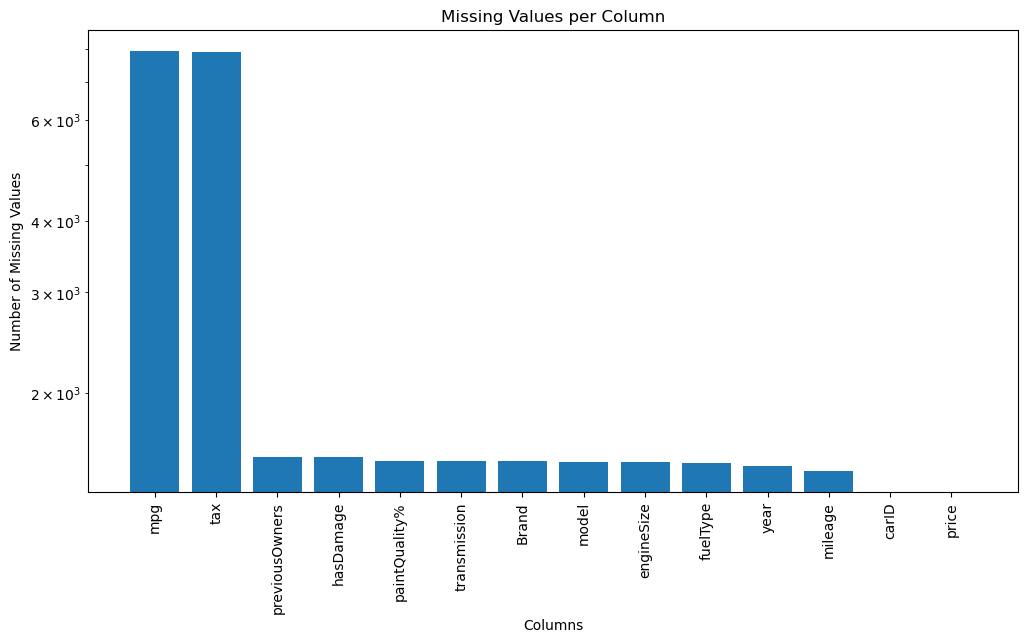

In [174]:
#Check Missing Values
missing_data=train.isnull().sum()
missing_data = missing_data.sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(missing_data.index, missing_data.values)  # x = columns, y = counts
plt.yscale("log")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()

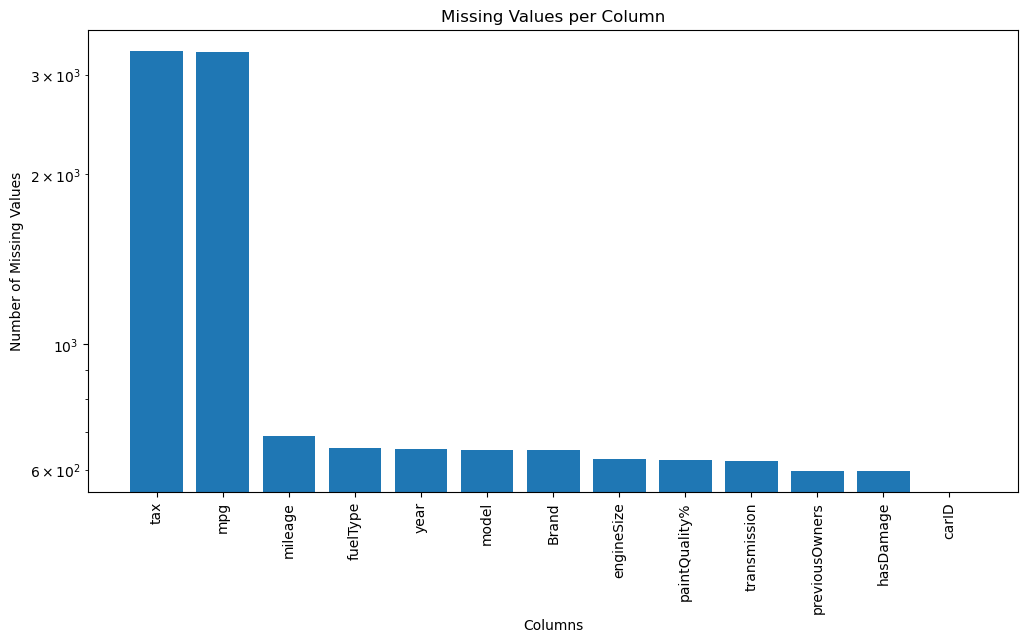

In [175]:
missing_data_test=test.isnull().sum()
missing_data_test = missing_data_test.sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(missing_data_test.index, missing_data_test.values)  # x = columns, y = counts
plt.yscale("log")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()
#Checking missing values for the testing dataset

In [176]:
# From this visualization(train and test), we can conclude that mpg and tax are the two columns with the most missing values
# We noticed that the missing values are not completely random because as:
# 'mpg'  might indicate that the car is new and hasn’t been driven yet.
# 'tax' could mean that, at the time of purchase, the tax value was recorded as 0 or not yet applied.

### Data Cleaning

#### Clean Fuel Type

In [177]:
# Map all variations to standard values
fuel_mapping = {
    # Petrol
    'Petrol': 'Petrol', 'petrol': 'Petrol', 'PETROL': 'Petrol',
    'etrol': 'Petrol', 'Petro': 'Petrol', 'PETRO': 'Petrol', 'etro': 'Petrol', 'ETRO': 'Petrol',
    
    # Diesel
    'Diesel': 'Diesel', 'diesel': 'Diesel', 'DIESEL': 'Diesel',
    'iesel': 'Diesel', 'IESEL': 'Diesel', 'iese': 'Diesel', 'IESE': 'Diesel',
    'Diese': 'Diesel', 'DIESE': 'Diesel', 'diese': 'Diesel',
    
    # Hybrid
    'Hybrid': 'Hybrid', 'hybrid': 'Hybrid', 'HYBRID': 'Hybrid',
    'ybri': 'Hybrid', 'Hybri': 'Hybrid', 'ybrid': 'Hybrid', 'YBRID': 'Hybrid', 'HYBRI': 'Hybrid',
    
    # Other / Electric
    'Other': 'Other', 'other': 'Other', 'OTHER': 'Other',
    'Othe': 'Other', 'ther': 'Other',
    'Electric': 'Electric'
}

train['fuelType'] = train['fuelType'].map(fuel_mapping).fillna('Unknown')

print("fuelType cleaned:")
print(train['fuelType'].value_counts())

fuelType cleaned:
fuelType
Petrol      41147
Diesel      30885
Hybrid       2225
Unknown      1545
Other         167
Electric        4
Name: count, dtype: int64


In [178]:
test['fuelType'] = test['fuelType'].map(fuel_mapping).fillna('Unknown')

#### Clean Transmission

In [179]:
trans_mapping = {
    # Manual
    'Manual': 'Manual', 'manual': 'Manual', 'MANUAL': 'Manual',
    'anual': 'Manual', 'Manua': 'Manual', 'MANUA': 'Manual', 'manua': 'Manual', 'anua': 'Manual',
    ' Manual ': 'Manual', ' Manual': 'Manual', 'manual ': 'Manual', ' MANUAL ': 'Manual',
    
    # Automatic
    'Automatic': 'Automatic', 'automatic': 'Automatic', 'AUTOMATIC': 'Automatic',
    'Automati': 'Automatic', 'AUTOMATI': 'Automatic', 'automati': 'Automatic',
    'utomatic': 'Automatic', 'UTOMATIC': 'Automatic', 'utomati': 'Automatic',
    
    # Semi-Auto
    'Semi-Auto': 'Semi-Auto', 'semi-auto': 'Semi-Auto', 'SEMI-AUTO': 'Semi-Auto',
    'Semi-Aut': 'Semi-Auto', 'SEMI-AUT': 'Semi-Auto', 'emi-Auto': 'Semi-Auto', 'EMI-AUTO': 'Semi-Auto',
    'emi-Aut': 'Semi-Auto', 'emi-auto': 'Semi-Auto', 'semi-aut': 'Semi-Auto',
    
    # Other / Unknown
    'unknown': 'Unknown', 'unknow': 'Unknown', 'nknown': 'Unknown', 'UNKNOWN': 'Unknown',
    'Other': 'Other'
}

train['transmission'] =train['transmission'].map(trans_mapping).fillna('Unknown')
test['transmission'] =test['transmission'].map(trans_mapping).fillna('Unknown')
print("\ntransmission cleaned:")
print(train['transmission'].value_counts())


transmission cleaned:
transmission
Manual       41592
Semi-Auto    16872
Automatic    15211
Unknown       2293
Other            5
Name: count, dtype: int64


#### Clean Brand

In [180]:
brand_mapping = {
    # VW
    'VW': 'VW', 'vw': 'VW', 'V': 'VW', 'w': 'VW', 'W': 'VW', 'v': 'VW',
    
    # Toyota
    'Toyota': 'Toyota', 'toyota': 'Toyota', 'TOYOTA': 'Toyota',
    'Toyot': 'Toyota', 'TOYOT': 'Toyota', 'oyota': 'Toyota', 'OYOTA': 'Toyota', 'toyot': 'Toyota',
    
    # Audi
    'Audi': 'Audi', 'audi': 'Audi', 'AUDI': 'Audi',
    'udi': 'Audi', 'UDI': 'Audi', 'Aud': 'Audi', 'AUD': 'Audi', 'aud': 'Audi',
    
    # Ford
    'Ford': 'Ford', 'ford': 'Ford', 'FORD': 'Ford',
    'For': 'Ford', 'FOR': 'Ford', 'ord': 'Ford', 'or': 'Ford', 'ORD': 'Ford',
    
    # BMW
    'BMW': 'BMW', 'bmw': 'BMW', 'BM': 'BMW', 'MW': 'BMW', 'mw': 'BMW',
    
    # Skoda
    'Skoda': 'Skoda', 'skoda': 'Skoda', 'SKODA': 'Skoda',
    'koda': 'Skoda', 'KODA': 'Skoda', 'Skod': 'Skoda', 'SKOD': 'Skoda', 'kod': 'Skoda',
    
    # Mercedes
    'Mercedes': 'Mercedes', 'mercedes': 'Mercedes', 'MERCEDES': 'Mercedes',
    'Mercede': 'Mercedes', 'MERCEDE': 'Mercedes', 'ercedes': 'Mercedes', 'ERCEDES': 'Mercedes',
    'mercede': 'Mercedes', 'ercede': 'Mercedes',
    
    # Opel
    'Opel': 'Opel', 'opel': 'Opel', 'OPEL': 'Opel',
    'Ope': 'Opel', 'OPE': 'Opel', 'pel': 'Opel', 'PEL': 'Opel', 'pe': 'Opel',
    
    # Hyundai
    'Hyundai': 'Hyundai', 'hyundai': 'Hyundai', 'HYUNDAI': 'Hyundai',
    'yundai': 'Hyundai', 'YUNDAI': 'Hyundai', 'Hyunda': 'Hyundai', 'HYUNDA': 'Hyundai',
    'yunda': 'Hyundai'
}

train['Brand'] = train['Brand'].map(brand_mapping).fillna('Other')
test['Brand'] = test['Brand'].map(brand_mapping).fillna('Other')
print("\nBrand cleaned:")
print(train['Brand'].value_counts())


Brand cleaned:
Brand
Ford        16056
Mercedes    11674
VW          10385
Opel         9348
BMW          7392
Audi         7322
Toyota       4622
Skoda        4302
Hyundai      3333
Other        1539
Name: count, dtype: int64


In [181]:
model_mapping = {
    # VW
    'golf': 'Golf', 'gol': 'Golf', 'glf': 'Golf', 'gof': 'Golf', 'golf s': 'Golf', 'golf sv': 'Golf',
    'passat': 'Passat', 'passa': 'Passat',
    'polo': 'Polo', 'pol': 'Polo',
    'tiguan': 'Tiguan', 'tigua': 'Tiguan', 'tiguan allspace': 'Tiguan', 'tiguan allspac': 'Tiguan',
    'touareg': 'Touareg', 'touare': 'Touareg',
    'sharan': 'Sharan', 'shara': 'Sharan',
    'touran': 'Touran', 'toura': 'Touran',
    'up': 'Up',
    't-roc': 'T-Roc', 't-ro': 'T-Roc',
    't-cross': 'T-Cross', 't-cros': 'T-Cross',
    'scirocco': 'Scirocco', 'scirocc': 'Scirocco',
    'arteon': 'Arteon', 'arteo': 'Arteon',
    'amarok': 'Amarok', 'amaro': 'Amarok',
    'caddy': 'Caddy', 'caddy maxi': 'Caddy', 'caddy life': 'Caddy', 'caddy maxi life': 'Caddy', 'caddy maxi lif': 'Caddy',
    'caravelle': 'Caravelle', 'caravell': 'Caravelle',
    'california': 'California',
    'jetta': 'Jetta',
    'cc': 'CC',
    'eos': 'EOS',
    'beetle': 'Beetle', 'beetl': 'Beetle',
    'fox': 'Fox',

    # Toyota
    'yaris': 'Yaris', 'yari': 'Yaris',
    'aygo': 'Aygo', 'ayg': 'Aygo',
    'corolla': 'Corolla', 'coroll': 'Corolla',
    'prius': 'Prius',
    'rav4': 'RAV4', 'rav': 'RAV4',
    'c-hr': 'C-HR', 'c-h': 'C-HR',
    'auris': 'Auris', 'auri': 'Auris',
    'avensis': 'Avensis',
    'camry': 'Camry',
    'land cruiser': 'Land Cruiser', 'land cruise': 'Land Cruiser',
    'hilux': 'Hilux', 'hilu': 'Hilux',
    'proace verso': 'Proace Verso',
    'gt86': 'GT86',
    'supra': 'Supra',
    'verso': 'Verso', 'vers': 'Verso',
    'verso-s': 'Verso-S',
    'urban cruiser': 'Urban Cruiser', 'urban cruise': 'Urban Cruiser',
    'iq': 'IQ',

    # Audi
    'a1': 'A1',
    'a3': 'A3',
    'a4': 'A4',
    'a5': 'A5',
    'a6': 'A6',
    'a7': 'A7',
    'a8': 'A8',
    'q2': 'Q2',
    'q3': 'Q3',
    'q5': 'Q5',
    'q7': 'Q7',
    'q8': 'Q8',
    'tt': 'TT',
    'r8': 'R8',
    'rs3': 'RS3',
    'rs4': 'RS4',
    'rs5': 'RS5',
    'rs6': 'RS6',
    'sq5': 'SQ5',
    'sq7': 'SQ7',
    's3': 'S3',
    's4': 'S4',
    's5': 'S5',
    's8': 'S8',
    'a2': 'A2',

    # Ford
    'fiesta': 'Fiesta', 'fiest': 'Fiesta',
    'focus': 'Focus', 'focu': 'Focus',
    'ka': 'Ka', 'ka+': 'Ka',
    'kuga': 'Kuga', 'kug': 'Kuga',
    'mondeo': 'Mondeo', 'monde': 'Mondeo',
    'puma': 'Puma',
    'ecosport': 'EcoSport', 'ecospor': 'EcoSport',
    's-max': 'S-Max', 's-ma': 'S-Max',
    'galaxy': 'Galaxy', 'galax': 'Galaxy',
    'tourneo connect': 'Tourneo Connect', 'grand tourneo connect': 'Tourneo Connect', 'grand tourneo connec': 'Tourneo Connect',
    'tourneo custom': 'Tourneo Custom', 'tourneo custo': 'Tourneo Custom',
    'mustang': 'Mustang',
    'edge': 'Edge', 'edg': 'Edge',
    'ranger': 'Ranger',
    'fusion': 'Fusion',
    'streetka': 'Streetka',
    'escort': 'Escort',

    # BMW
    '1 series': '1 Series', '1 serie': '1 Series',
    '2 series': '2 Series', '2 serie': '2 Series',
    '3 series': '3 Series', '3 serie': '3 Series',
    '4 series': '4 Series', '4 serie': '4 Series',
    '5 series': '5 Series', '5 serie': '5 Series',
    '6 series': '6 Series', '6 serie': '6 Series',
    '7 series': '7 Series', '7 serie': '7 Series',
    '8 series': '8 Series', '8 serie': '8 Series',
    'x1': 'X1',
    'x2': 'X2',
    'x3': 'X3',
    'x4': 'X4',
    'x5': 'X5',
    'x6': 'X6',
    'x7': 'X7',
    'm3': 'M3',
    'm4': 'M4',
    'm5': 'M5',
    'm2': 'M2',
    'm6': 'M6',
    'i3': 'i3',
    'i8': 'i8',

    # Mercedes
    'a class': 'A Class', 'a clas': 'A Class',
    'b class': 'B Class', 'b clas': 'B Class',
    'c class': 'C Class', 'c clas': 'C Class',
    'e class': 'E Class', 'e clas': 'E Class',
    's class': 'S Class', 's clas': 'S Class',
    'cla class': 'CLA Class',
    'cls class': 'CLS Class', 'cls clas': 'CLS Class',
    'gla class': 'GLA Class', 'gla clas': 'GLA Class',
    'glc class': 'GLC Class', 'glc clas': 'GLC Class',
    'gle class': 'GLE Class', 'gle clas': 'GLE Class',
    'gls class': 'GLS Class', 'gls clas': 'GLS Class',
    'g class': 'G Class',
    'gl class': 'GL Class',
    'sl class': 'SL Class', 'sl clas': 'SL Class',
    'slk': 'SLK',
    'v class': 'V Class', 'v clas': 'V Class',
    'cl class': 'CL Class', 'cl clas': 'CL Class',
    'glb class': 'GLB Class',
    'm class': 'M Class', 'm clas': 'M Class',
    'x-class': 'X-Class', 'x-clas': 'X-Class',
    'clc class': 'CLC Class',
    'clk': 'CLK',

    # Skoda
    'octavia': 'Octavia', 'octavi': 'Octavia',
    'fabia': 'Fabia', 'fabi': 'Fabia',
    'superb': 'Superb', 'super': 'Superb',
    'kodiaq': 'Kodiaq', 'kodia': 'Kodiaq',
    'karoq': 'Karoq', 'karo': 'Karoq',
    'scala': 'Scala', 'scal': 'Scala',
    'kamiq': 'Kamiq', 'kami': 'Kamiq',
    'citigo': 'Citigo', 'citig': 'Citigo',
    'rapid': 'Rapid', 'rapi': 'Rapid',
    'yeti': 'Yeti', 'yet': 'Yeti',
    'yeti outdoor': 'Yeti Outdoor', 'yeti outdoo': 'Yeti Outdoor',
    'roomster': 'Roomster', 'roomste': 'Roomster',

    # Opel
    'corsa': 'Corsa', 'cors': 'Corsa',
    'astra': 'Astra', 'astr': 'Astra',
    'insignia': 'Insignia', 'insigni': 'Insignia',
    'mokka': 'Mokka', 'mokk': 'Mokka',
    'mokka x': 'Mokka X',
    'crossland x': 'Crossland X', 'crossland': 'Crossland X',
    'grandland x': 'Grandland X', 'grandland': 'Grandland X',
    'zafira': 'Zafira', 'zafir': 'Zafira',
    'zafira tourer': 'Zafira Tourer', 'zafira toure': 'Zafira Tourer',
    'meriva': 'Meriva', 'meriv': 'Meriva',
    'adam': 'Adam', 'ada': 'Adam',
    'viva': 'Viva', 'viv': 'Viva',
    'gtc': 'GTC',
    'combo life': 'Combo Life', 'combo lif': 'Combo Life',
    'vivaro': 'Vivaro',
    'cascada': 'Cascada',
    'ampera': 'Ampera',
    'antara': 'Antara',
    'agila': 'Agila',
    'vectra': 'Vectra',
    'tigra': 'Tigra',

    # Hyundai
    'i10': 'i10', 'i20': 'i20', 'i30': 'i30', 'i40': 'i40', 'i800': 'i800', 'i80': 'i800',
    'ix20': 'ix20',
    'ix35': 'ix35',
    'tucson': 'Tucson', 'tucso': 'Tucson',
    'santa fe': 'Santa Fe', 'santa f': 'Santa Fe',
    'kona': 'Kona', 'kon': 'Kona',
    'ioniq': 'Ioniq', 'ioni': 'Ioniq',
    'getz': 'Getz',
    'accent': 'Accent',
    'veloste': 'Veloster',
    'terracan': 'Terracan',

    # Other
    'b-max': 'B-Max', 'b-ma': 'B-Max',
    'c-max': 'C-Max', 'c-ma': 'C-Max',
    'grand c-max': 'Grand C-Max', 'grand c-ma': 'Grand C-Max',
    'shuttle': 'Shuttle',
    'ka': 'Ka',
    'z3': 'Z3',
    'z4': 'Z4',
    'kadjar': 'Kadjar',
    '200': '200',
    '220': '220',
    '230': '230',
    'u': 'U',
    'k': 'K',
    't': 'T',
    'i': 'I',
    'x': 'X',
    'z': 'Z',
    'm': 'M',
    'a': 'A',
    's': 'S',
    'rs': 'RS',
    's8': 'S8',
    'q': 'Q',
    'ix2': 'ix2',
    'i2': 'i2',
    'i1': 'i1'
}
train['model'] = train['model'].map(model_mapping).fillna('Other')
test['model'] = test['model'].map(model_mapping).fillna('Other')
print("\nmodel cleaned:")
print(train['model'].value_counts())


model cleaned:
model
Other       75937
Focus           3
Aygo            2
Golf            2
Fiesta          2
Corsa           2
C Class         2
Kuga            1
Ka              1
Octavia         1
Corolla         1
Tiguan          1
Q5              1
1 Series        1
i3              1
E Class         1
B Class         1
A8              1
4 Series        1
Astra           1
230             1
220             1
A Class         1
X1              1
RAV4            1
Kodiaq          1
Polo            1
200             1
GTC             1
Yaris           1
Name: count, dtype: int64


In [182]:
# 4. Final Check: Cleaned Data
print("\nFinal Unique Values After Cleaning:")
print("fuelType:", sorted(train['fuelType'].unique()))
print("transmission:", sorted(train['transmission'].unique()))
print("Brand:", sorted(train['Brand'].unique()))


Final Unique Values After Cleaning:
fuelType: ['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol', 'Unknown']
transmission: ['Automatic', 'Manual', 'Other', 'Semi-Auto', 'Unknown']
Brand: ['Audi', 'BMW', 'Ford', 'Hyundai', 'Mercedes', 'Opel', 'Other', 'Skoda', 'Toyota', 'VW']


In [183]:
print("Model:", sorted(train['model'].unique()))

Model: ['1 Series', '200', '220', '230', '4 Series', 'A Class', 'A8', 'Astra', 'Aygo', 'B Class', 'C Class', 'Corolla', 'Corsa', 'E Class', 'Fiesta', 'Focus', 'GTC', 'Golf', 'Ka', 'Kodiaq', 'Kuga', 'Octavia', 'Other', 'Polo', 'Q5', 'RAV4', 'Tiguan', 'X1', 'Yaris', 'i3']


### Check For Negative Values

In [184]:
# 1 previous Owners
# Since the number of previous owners cannot be negative, we assume these values were miswritten and correct them.
# This column should also be converted to an integer type.
train["previousOwners"] = train["previousOwners"].abs().round().astype('Int64')
train["previousOwners"].unique()



<IntegerArray>
[4, 1, 2, 3, 0, <NA>, 6]
Length: 7, dtype: Int64

In [185]:
test["previousOwners"] = test["previousOwners"].abs().round().astype('Int64')
test["previousOwners"].unique()

<IntegerArray>
[3, 2, 1, 4, 0, <NA>, 6]
Length: 7, dtype: Int64

In [186]:
train["tax"] = train["tax"].abs()
train["tax"].unique()

array([         nan, 145.        ,  30.        ,  20.        ,
       150.        , 160.        ,  56.19320154,   0.        ,
       125.        , 200.        , 250.        , 135.        ,
       300.        , 205.        , 260.        , 326.02823317,
       325.        ,  45.78061049, 265.        , 305.        ,
       303.14889146, 235.        , 299.47350391, 240.        ,
       165.        , 140.        , 540.        , 155.        ,
       220.        , 120.        , 330.        , 290.48678508,
        20.24107949,  18.33074314, 327.91577835, 270.        ,
       115.        , 185.        , 316.48718937, 570.        ,
        49.15354066, 316.29630636,  60.6840948 , 555.        ,
       277.38425448,  91.12163048,  10.        , 315.        ,
       190.        ,  31.91494466, 230.        ,  43.24208237,
       294.84340933, 195.        , 580.        , 290.        ,
       130.        , 565.        , 210.        , 280.        ,
       255.        , 520.        , 295.        , 245.  

In [187]:
test["tax"] = test["tax"].abs()
test["tax"].unique()

array([205.        , 150.        , 125.        , 145.        ,
       200.        , 300.        ,          nan, 160.        ,
        20.        ,   0.        ,  30.        , 240.        ,
       135.        , 260.        , 299.47350391, 570.        ,
       235.        , 555.        , 326.02823317, 165.        ,
        56.19320154, 140.        , 327.91577835, 265.        ,
        49.15354066,  45.78061049, 305.        , 325.        ,
       294.84340933,  43.24208237, 277.38425448,  60.6840948 ,
       316.29630636,  10.        , 330.        , 115.        ,
       195.        ,  20.24107949, 316.48718937, 565.        ,
       120.        , 303.14889146, 290.48678508,  31.91494466,
        18.33074314, 515.        , 245.        , 580.        ,
       315.        , 290.        , 220.        ,  91.12163048,
       280.        , 190.        , 540.        , 230.        ,
       130.        , 185.        , 270.        ])

In [188]:
train['paintQuality%'].unique()

array([ 63.        ,  50.        ,  56.        ,  97.        ,
        74.        ,  75.        ,  59.        ,  85.        ,
        35.        ,  68.        ,  45.        ,  30.        ,
        69.        ,  53.        ,  57.        ,  40.        ,
        60.        ,  94.        ,  33.        ,  51.        ,
        47.        ,  87.        ,  61.        ,  83.        ,
        95.        ,  46.        ,  54.        ,  80.        ,
        77.        ,  90.        ,  91.        ,  71.        ,
        44.        ,  38.        ,  64.        ,  55.        ,
        66.        ,  82.        ,  41.        ,  81.        ,
        79.        ,  72.        ,  34.        ,  88.        ,
                nan,  43.        ,  31.        ,  32.        ,
        96.        ,  84.        ,  70.        ,  86.        ,
        92.        ,  52.        ,  39.        ,  42.        ,
        73.        ,  78.        ,  37.        ,  65.        ,
        93.        ,  89.        ,  99.        ,  36.  

In [189]:
# We noticed that some values in the 'paintQuality' column exceed 100%
# so we decided to cap these values at the logical maximum of 100%.
train['paintQuality%']= np.where(train['paintQuality%']>100,100,train['paintQuality%'])
test['paintQuality%']= np.where(test['paintQuality%']>100,100,test['paintQuality%'])

In [190]:
train['engineSize'].unique()

array([ 2.        ,  1.5       ,  1.        ,  1.4       ,  1.6       ,
               nan,  1.2       ,  3.        ,  1.8       ,  2.1       ,
        1.3       ,  0.7395339 ,  0.        ,  2.3       ,  1.1       ,
        4.        ,  1.7       ,  2.98579344,  2.2       ,  2.5       ,
        2.61964142, -0.1034928 ,  2.78177621,  2.63120047,  3.72371217,
        0.15452932,  4.2       ,  3.2       ,  2.9       ,  2.8       ,
        0.31340658,  2.06411863,  3.73923548,  2.4       ,  0.18642488,
        2.6631132 ,  5.2       ,  0.19146242,  5.        ,  0.30707394,
        0.37112737,  4.4       ,  6.2       ,  3.82275785,  1.9       ,
        0.6       ,  6.6       ,  5.5       ,  3.5       ,  4.7       ,
        0.16286595,  2.7       ,  3.6       ,  2.6       ,  4.3       ,
        5.4       ,  4.5       ,  4.1       ,  6.        ])

In [191]:
#we moticed that in the engine size column we have some negative values which is irrelevant 
#We will then change them with the absolut function
train['engineSize']=np.where(train['engineSize']<0,abs(train['engineSize']),train['engineSize'])
test['engineSize']=np.where(test['engineSize']<0,abs(test['engineSize']),test['engineSize'])

In [192]:
train['mileage']=np.where(train['mileage']<0,abs(train['mileage']),train['mileage'])
test['mileage']=np.where(test['mileage']<0,abs(test['mileage']),test['mileage'])

In [193]:
train['mpg']=np.where(train['mpg']<0,abs(train['mpg']),train['mpg'])
test['mpg']=np.where(test['mpg']<0,abs(test['mpg']),test['mpg'])

In [194]:
# Identifying duplicate records in the dataset by comparing all columns except 'carID',
# since 'carID' is a unique identifier and should not be used to detect duplicates.
cols_except_id=[c for c in train.columns if c!= 'carID']
duplicates= train[train.duplicated(subset=cols_except_id,keep=False)]
duplicates

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
3127,59143,Opel,Other,2019.0,14775,Manual,10.0,Diesel,145.0,58.9,1.6,76.0,4,0.0
5614,58836,Opel,Other,2019.0,14775,Manual,10.0,Diesel,145.0,58.9,1.6,76.0,4,0.0
8131,15152,Ford,Other,2018.0,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4,0.0
9431,33890,Hyundai,Other,2019.0,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3,0.0
10579,42198,Mercedes,Other,2014.0,11750,Semi-Auto,77043.0,Diesel,NaN,NaN,2.1,47.0,2,0.0
15257,33774,Hyundai,Other,2017.0,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4,0.0
24199,23477,Ford,Other,2017.0,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4,0.0
41122,37638,Mercedes,Other,2014.0,11750,Semi-Auto,77043.0,Diesel,NaN,NaN,2.1,47.0,2,0.0
42120,28593,Ford,Other,2019.0,19500,Manual,3000.0,Diesel,NaN,NaN,1.5,91.0,4,0.0
45996,21775,Ford,Other,2019.0,19500,Manual,3000.0,Diesel,NaN,NaN,1.5,91.0,4,0.0


In [195]:
train = train.drop_duplicates(subset=train.columns.difference(['carID']))
test = test.drop_duplicates(subset=test.columns.difference(['carID']))

##### **Before moving on with preprocessing though, we need to split the dataset into a training and a validation set.**

In [ ]:
# Save ID for later
train_ids = train['carID']

# Features & target
X_full = train.drop(columns=['price', 'carID'])
y_full = train['price']

# Split
X_train, X_val, y_train, y_val = train_test_split(
    X_full, y_full,
    test_size=0.25,
    random_state=42
)

# Test features (no target)
X_test = test.drop(columns=['carID'])
test_ids = test['carID']

print(f"Train: {X_train.shape} | Val: {X_val.shape} | Test: {X_test.shape}")

Train: (56974, 12) | Val: (18992, 12) | Test: (32566, 12)


In [197]:
#we drop price from train because we should predict it. Also the carID because it is not relevant for the prediction

In [198]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

print(f"Numeric: {len(num_cols)} → {num_cols[:5]}...")
print(f"Categorical: {len(cat_cols)} → {cat_cols[:5]}...")

Numeric: 8 → ['year', 'mileage', 'tax', 'mpg', 'engineSize']...
Categorical: 4 → ['Brand', 'model', 'transmission', 'fuelType']...


#### Handling Missing Values

In [199]:
# Imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply to numerical columns
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Apply to categorical columns
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

print("Missing values handled.")

Missing values handled.


#### Handling Outliers

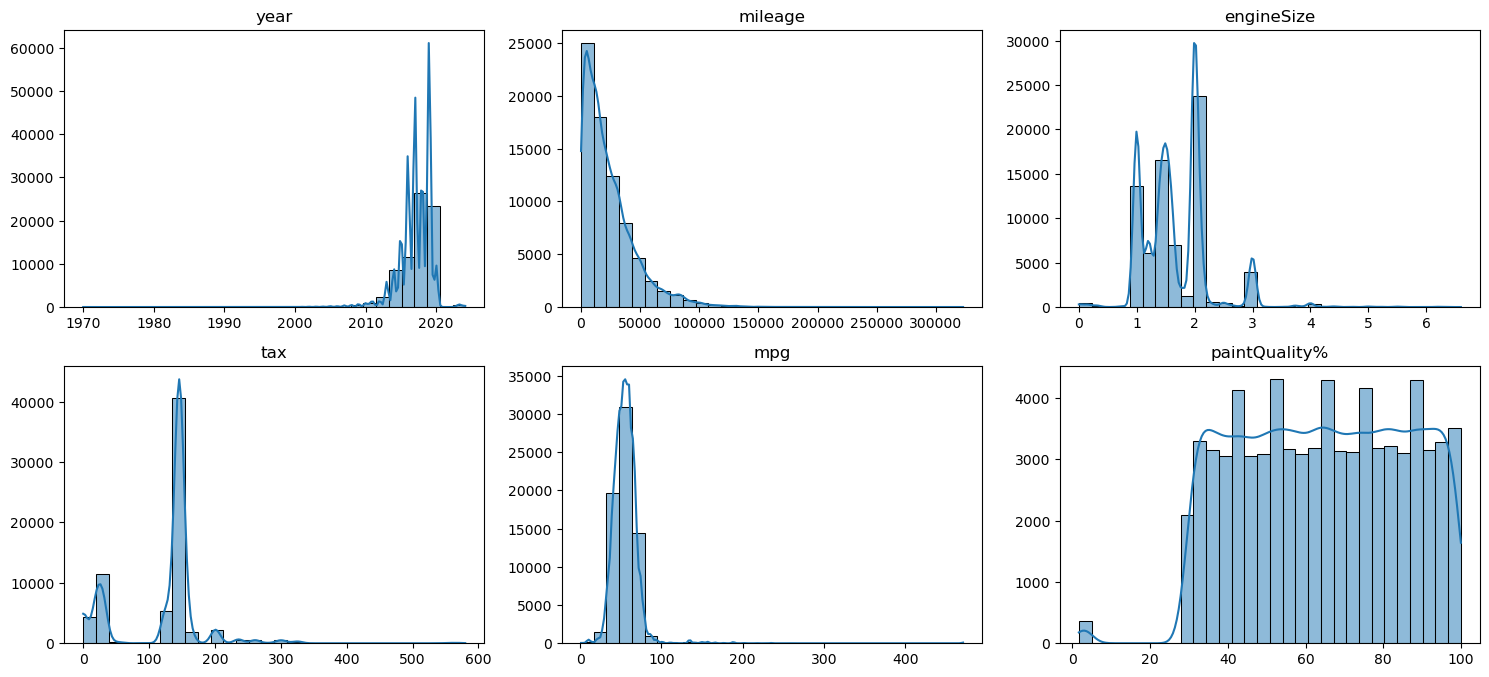

In [200]:
num_cols = ['year', 'mileage', 'engineSize', 'tax', 'mpg', 'paintQuality%']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.histplot(train[col], bins=30, kde=True) 
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [201]:
num_cols = ['year', 'mileage', 'engineSize', 'tax', 'mpg', 'paintQuality%']
skew_values = X_train[num_cols].skew().sort_values(ascending=False)
print("Skewness for numerical features:\n")
print(skew_values)

Skewness for numerical features:

mpg              8.110322
mileage          1.817365
engineSize       1.257939
tax              0.119787
paintQuality%   -0.088821
year            -1.817842
dtype: float64


In [202]:
### Skewness Analysis
#mpg (8.12): Highly right-skewed distribution, indicating that most cars have moderate fuel efficiency while a few have extremely high values 
#mileage (1.83):Right-skewed, as most cars have low to moderate mileage and few have very high mileage. 
#engineSize (1.26):Right-skewed, reflecting that most cars have small engines and few have very large ones.  
#tax (-0.00):Almost normal distribution. 
#paintQuality% (-0.09):Nearly normal distribution with a very slight left skew , meaning cars have diverse paint conditions.
#year (-1.82): Left-skewed, as most cars are newer models while a few are much older 

In [203]:
# The Z-score method was chosen for this dataset because most numerical features 
# (such as mileage, engineSize, tax, mpg, and year) are continuous and approximately normally distributed.

In [204]:
# Detecting and removing outliers using the Z-score method.
# Rows with any feature having |Z| > 3 are considered outliers and will be removed from the dataset.

In [205]:
from scipy import stats
def cap_outliers(df, cols, threshold=3):
    for col in cols:
        z_scores = np.abs(stats.zscore(df[col]))
        upper = df[col].mean() + threshold * df[col].std()
        lower = df[col].mean() - threshold * df[col].std()
        df[col] = np.clip(df[col], lower, upper)
    return df

X_train = cap_outliers(X_train, num_cols)
X_val = cap_outliers(X_val, num_cols)
# Note: We don't cap test set outliers to avoid data leakage; handle if needed post-prediction.

print("Outliers capped in numerical columns.")

Outliers capped in numerical columns.


#### Encoding  Categorical Variables and Scaling Numerical Variables

In [206]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

# Fit and transform train
X_train_pre = preprocessor.fit_transform(X_train)
# Transform val and test
X_val_pre = preprocessor.transform(X_val)
X_test_pre = preprocessor.transform(X_test)

# Get new feature names (for later use)
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_cols = np.concatenate([num_cols, encoded_cat_cols])
X_train_pre = pd.DataFrame(X_train_pre, columns=all_cols, index=X_train.index)
X_val_pre = pd.DataFrame(X_val_pre, columns=all_cols, index=X_val.index)
X_test_pre = pd.DataFrame(X_test_pre, columns=all_cols, index=X_test.index)

print(f"Preprocessed shapes: Train {X_train_pre.shape}, Val {X_val_pre.shape}, Test {X_test_pre.shape}")

Preprocessed shapes: Train (56974, 51), Val (18992, 51), Test (32566, 51)


### Feature selection

As First Step Wz will Start By Filter Method : We will choose k equal to 10 at first

In [207]:
# Filter method
selector_filter = SelectKBest(score_func=f_regression, k=10)  # Top 10 features
X_train_sel = selector_filter.fit_transform(X_train_pre, y_train)
X_val_sel = selector_filter.transform(X_val_pre)
X_test_sel = selector_filter.transform(X_test_pre)

selected_features = X_train_pre.columns[selector_filter.get_support()].tolist()
print(f"Selected features (Filter): {selected_features}")

Selected features (Filter): ['year', 'mileage', 'engineSize', 'tax', 'mpg', 'Brand_Mercedes', 'Brand_Opel', 'transmission_Automatic', 'transmission_Manual', 'transmission_Semi-Auto']


### Model Training

In [208]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [209]:
model = Ridge(alpha=1.0, random_state=42)
model.fit(X_train_sel, y_train)

# Predict on validation
y_val_pred = model.predict(X_val_sel)

# Evaluate
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"MSE: {mse_val:.2f} | RMSE: {rmse:.2f} | R²: {r2_val:.4f}")


MSE: 27900891.07 | RMSE: 5282.13 | R²: 0.7121


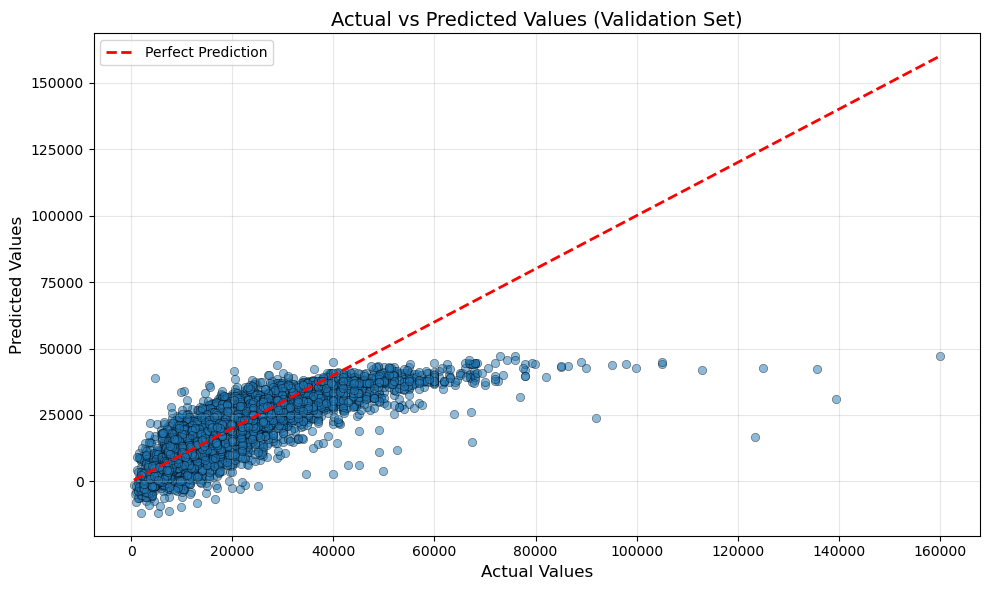

In [210]:
y_val_pred = model.predict(X_val_sel)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Values (Validation Set)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

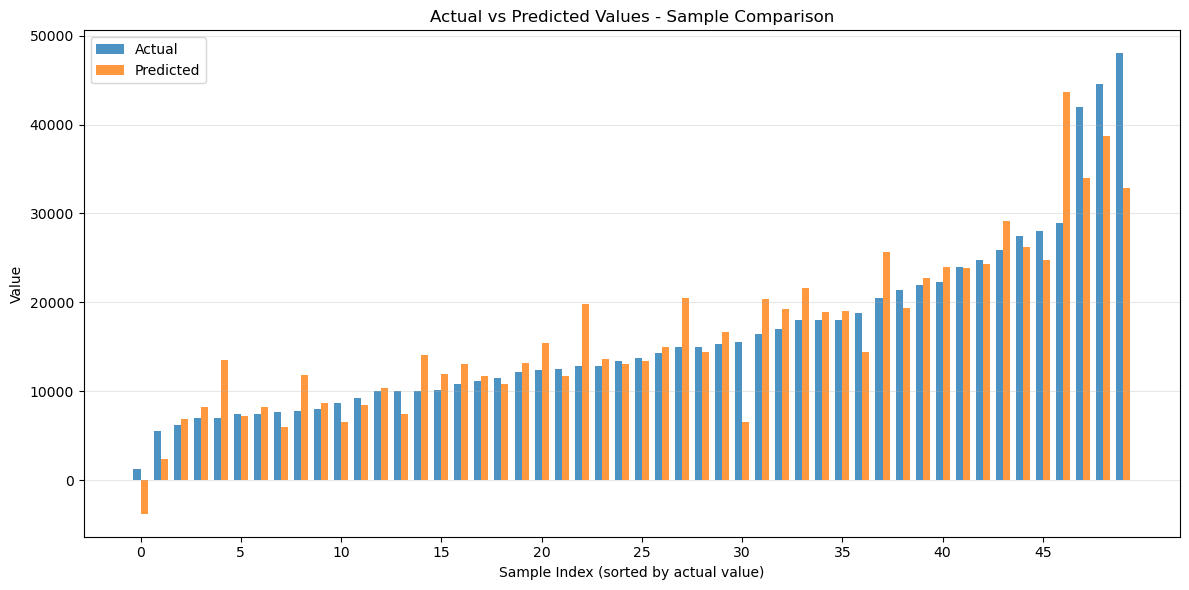

In [211]:


y_val_pred = model.predict(X_val_sel)

# Take a sample for clearer visualization (optional)
sample_size = min(50, len(y_val))
indices = np.random.choice(len(y_val), sample_size, replace=False)
y_val_sample = y_val.iloc[indices]
y_pred_sample = y_val_pred[indices]

# Sort by actual values for better visualization
sorted_indices = np.argsort(y_val_sample.values)
y_val_sorted = y_val_sample.iloc[sorted_indices]
y_pred_sorted = y_pred_sample[sorted_indices]

plt.figure(figsize=(12, 6))
x = np.arange(len(y_val_sorted))
width = 0.35

plt.bar(x - width/2, y_val_sorted, width, label='Actual', alpha=0.8)
plt.bar(x + width/2, y_pred_sorted, width, label='Predicted', alpha=0.8)

plt.xlabel('Sample Index (sorted by actual value)')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values - Sample Comparison')
plt.legend()
plt.xticks(x[::5], x[::5])  # Show every 5th index
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [212]:
# Predict on test
y_test_pred = model.predict(X_test_sel)

# Create submission (assuming you need a CSV with carID and price)
submission = pd.DataFrame({'carID': test_ids, 'price': y_test_pred})
submission.to_csv('predictions.csv', index=False)
print("Test predictions saved to 'predictions.csv'")

Test predictions saved to 'predictions.csv'


In [213]:
#We changed Feature selection Method to RFE 

In [214]:
from sklearn.feature_selection import  RFE
estimator_rfe = LinearRegression()
selector_rfe = RFE(estimator_rfe, n_features_to_select=10, step=1)

X_train_rfe = selector_rfe.fit_transform(X_train_pre, y_train)
X_val_rfe   = selector_rfe.transform(X_val_pre)
X_test_rfe  = selector_rfe.transform(X_test_pre)

selected_rfe = X_train_pre.columns[selector_rfe.support_].tolist()
print(f"Selected features (RFE): {selected_rfe}")


Selected features (RFE): ['year', 'engineSize', 'model_220', 'model_Astra', 'model_Corsa', 'model_GTC', 'model_Golf', 'model_Kodiaq', 'model_i3', 'fuelType_Electric']


In [215]:
model_rfe = Ridge(alpha=1.0, random_state=42)
model_rfe.fit(X_train_rfe, y_train)

y_val_pred_rfe = model_rfe.predict(X_val_rfe)
mse_rfe = mean_squared_error(y_val, y_val_pred_rfe)
r2_rfe  = r2_score(y_val, y_val_pred_rfe)
rmse_rfe = np.sqrt(mean_squared_error(y_val, y_val_pred_rfe))
print(f"MSE: {mse_rfe:.2f} | RMSE: {rmse_rfe:.2f} | R²: {r2_rfe:.4f}")

MSE: 38495116.49 | RMSE: 6204.44 | R²: 0.6028


In [216]:
#We changed Feature Selection Method to Lasso
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel

In [217]:
lasso_selector = Lasso(alpha=0.1, random_state=42)
lasso_selector.fit(X_train_pre, y_train)

selector_embed = SelectFromModel(lasso_selector, prefit=True)
X_train_lasso = selector_embed.transform(X_train_pre)
X_val_lasso   = selector_embed.transform(X_val_pre)
X_test_lasso  = selector_embed.transform(X_test_pre)

selected_lasso = X_train_pre.columns[selector_embed.get_support()].tolist()
print(f"Selected features (Lasso): {selected_lasso}")

Selected features (Lasso): ['year', 'mileage', 'engineSize', 'tax', 'mpg', 'paintQuality%', 'Brand_Audi', 'Brand_BMW', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Other', 'Brand_Skoda', 'Brand_Toyota', 'Brand_VW', 'model_C Class', 'model_Corsa', 'model_GTC', 'model_Ka', 'model_Kodiaq', 'model_Other', 'model_i3', 'transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'transmission_Unknown', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol', 'fuelType_Unknown']


c:\Users\Lenovo\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.723e+10, tolerance: 5.362e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [218]:
model_lasso = Ridge(alpha=1.0, random_state=42)
model_lasso.fit(X_train_lasso, y_train)

y_val_pred_lasso = model_lasso.predict(X_val_lasso)
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
r2_lasso  = r2_score(y_val, y_val_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
print(f"MSE: {mse_lasso:.2f} | RMSE: {rmse_lasso:.2f} | R²: {r2_lasso:.4f}")

MSE: 25747264.71 | RMSE: 5074.18 | R²: 0.7343


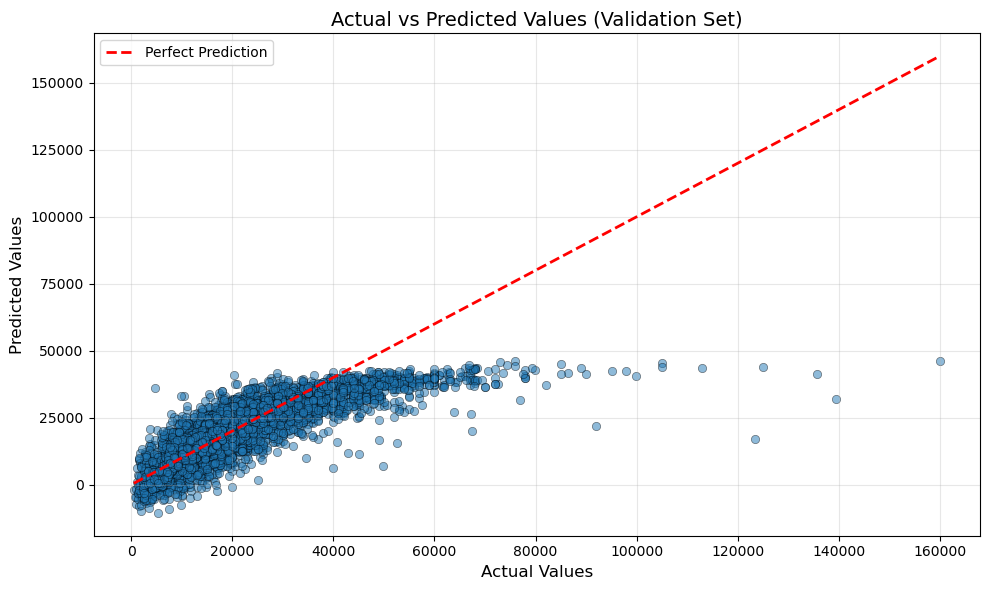

In [219]:
y_val_pred_lasso = model_lasso.predict(X_val_lasso)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_lasso, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Values (Validation Set)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Another method for Encoding : Target Encoding

In [220]:
# Target Encoding Function
def target_encode_fit(X_train, y_train, cat_cols, smoothing=5):
    """Calculate mean target value for each category"""
    global_mean = y_train.mean()
    target_mappings = {}
    
    for col in cat_cols:
        # Calculate mean and count for each category
        category_stats = pd.DataFrame({
            'mean': y_train.groupby(X_train[col]).mean(),
            'count': y_train.groupby(X_train[col]).count()
        })
        
        # Apply smoothing
        category_stats['smoothed_mean'] = (
            (category_stats['mean'] * category_stats['count'] + global_mean * smoothing) / 
            (category_stats['count'] + smoothing)
        )
        
        target_mappings[col] = category_stats['smoothed_mean'].to_dict()
    
    return target_mappings, global_mean

def target_encode_transform(X, target_mappings, global_mean, cat_cols):
    """Transform categorical columns using target encoding"""
    X_encoded = X.copy()
    
    for col in cat_cols:
        X_encoded[col] = X[col].map(target_mappings[col]).fillna(global_mean)
    
    return X_encoded

print(" Target encoding functions defined")

 Target encoding functions defined


In [221]:
# Fit target encoding on training data
target_mappings, global_mean = target_encode_fit(X_train, y_train, cat_cols, smoothing=5)

# Transform train, val, and test
X_train_encoded = target_encode_transform(X_train, target_mappings, global_mean, cat_cols)
X_val_encoded = target_encode_transform(X_val, target_mappings, global_mean, cat_cols)
X_test_encoded = target_encode_transform(X_test, target_mappings, global_mean, cat_cols)

print(f" Target encoding complete")
print(f"  Categorical columns encoded: {len(cat_cols)}")


 Target encoding complete
  Categorical columns encoded: 4


In [222]:
# Create scaler and fit on training data
scaler = StandardScaler()
scaler.fit(X_train_encoded[num_cols])

# Scale numerical columns in all datasets
X_train_encoded[num_cols] = scaler.transform(X_train_encoded[num_cols])
X_val_encoded[num_cols] = scaler.transform(X_val_encoded[num_cols])
X_test_encoded[num_cols] = scaler.transform(X_test_encoded[num_cols])

In [223]:
X_train_pre_target = X_train_encoded
X_val_pre_target = X_val_encoded
X_test_pre_target = X_test_encoded
# We just rename the variables for consistency 

In [224]:
print(f"Preprocessed shapes (Target Encoding):")
print(f"  Train: {X_train_pre_target.shape}")
print(f"  Val:   {X_val_pre_target.shape}")
print(f"  Test:  {X_test_pre_target.shape}")

Preprocessed shapes (Target Encoding):
  Train: (56974, 12)
  Val:   (18992, 12)
  Test:  (32566, 12)


In [225]:

selector_target = SelectKBest(score_func=f_regression, k=10)
X_train_lasso_target = selector_target.fit_transform(X_train_pre_target, y_train)
X_val_lasso_target = selector_target.transform(X_val_pre_target)
X_test_lasso_target = selector_target.transform(X_test_pre_target)

selected_features_target = X_train_pre_target.columns[selector_target.get_support()].tolist()
print(f"Selected features (Target Encoding): {selected_features_target}")

Selected features (Target Encoding): ['Brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners']


In [226]:

# Train model
model_target = Ridge(alpha=1.0, random_state=42)
model_target.fit(X_train_lasso_target, y_train)

# Predictions
y_val_pred_target = model_target.predict(X_val_lasso_target)

# Metrics
mse_target = mean_squared_error(y_val, y_val_pred_target)
rmse_target = np.sqrt(mse_target)
r2_target = r2_score(y_val, y_val_pred_target)

print(f"\n[Target Encoding + Ridge]")
print(f"  MSE:  {mse_target:,.2f}")
print(f"  RMSE: {rmse_target:,.2f}")
print(f"  R²:   {r2_target:.4f}")


[Target Encoding + Ridge]
  MSE:  26,972,316.84
  RMSE: 5,193.49
  R²:   0.7217


In [227]:
#Here we compared The two methods of encoding using the same model : Ridge Regression

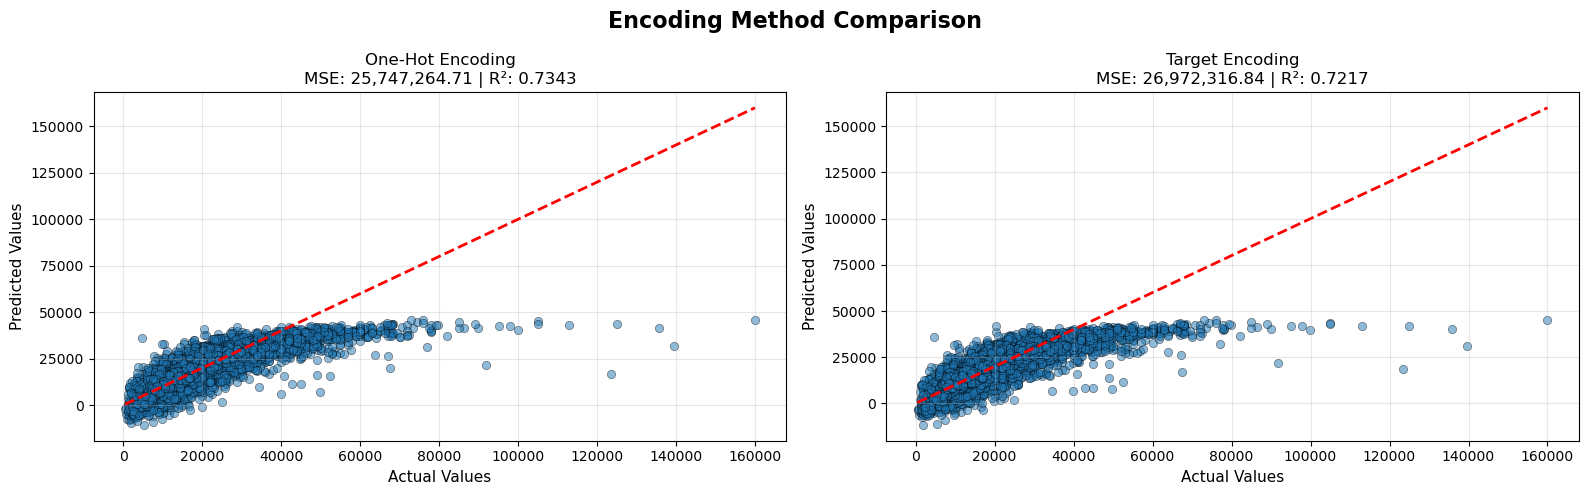

In [228]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# One-Hot Encoding plot
axes[0].scatter(y_val, y_val_pred_lasso, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values', fontsize=11)
axes[0].set_ylabel('Predicted Values', fontsize=11)
axes[0].set_title(f'One-Hot Encoding\nMSE: {mse_lasso:,.2f} | R²: {r2_lasso:.4f}', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Target Encoding plot
axes[1].scatter(y_val, y_val_pred_target, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values', fontsize=11)
axes[1].set_ylabel('Predicted Values', fontsize=11)
axes[1].set_title(f'Target Encoding\nMSE: {mse_target:,.2f} | R²: {r2_target:.4f}', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.suptitle('Encoding Method Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [229]:
# we will tes target encoding with lasso for feature selection since for one hot encoding it reaches the best score 

In [230]:
# Apply Lasso selector on target-encoded data
lasso_selector_target = Lasso(alpha=0.1, random_state=42)
lasso_selector_target.fit(X_train_pre_target, y_train)

selector_embed_target = SelectFromModel(lasso_selector_target, prefit=True)

X_train_lasso_target = selector_embed_target.transform(X_train_pre_target)
X_val_lasso_target = selector_embed_target.transform(X_val_pre_target)
X_test_lasso_target = selector_embed_target.transform(X_test_pre_target)

selected_lasso_target = X_train_pre_target.columns[selector_embed_target.get_support()].tolist()

print(f"\nSelected features (Lasso + Target Encoding): {len(selected_lasso_target)}")
print(f"Features: {selected_lasso_target}")

# Show shape comparison
print(f"\nShape comparison:")
print(f"  Before selection: {X_train_pre_target.shape}")
print(f"  After selection:  {X_train_lasso_target.shape}")
print(f"  Features removed: {X_train_pre_target.shape[1] - X_train_lasso_target.shape[1]}")


Selected features (Lasso + Target Encoding): 11
Features: ['Brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']

Shape comparison:
  Before selection: (56974, 12)
  After selection:  (56974, 11)
  Features removed: 1


c:\Users\Lenovo\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [231]:
# Train Ridge model
model_target_lasso = Ridge(alpha=1.0, random_state=42)
model_target_lasso.fit(X_train_lasso_target, y_train)

# Predictions
y_val_pred_target_lasso = model_target_lasso.predict(X_val_lasso_target)

# Metrics
mse_target_lasso = mean_squared_error(y_val, y_val_pred_target_lasso)
rmse_target_lasso = np.sqrt(mse_target_lasso)
r2_target_lasso = r2_score(y_val, y_val_pred_target_lasso)

print(f"\n[Target Encoding + Lasso Selection + Ridge]")
print(f"  MSE:  {mse_target_lasso:,.2f}")
print(f"  RMSE: {rmse_target_lasso:,.2f}")
print(f"  R²:   {r2_target_lasso:.4f}")


[Target Encoding + Lasso Selection + Ridge]
  MSE:  26,970,819.04
  RMSE: 5,193.34
  R²:   0.7217


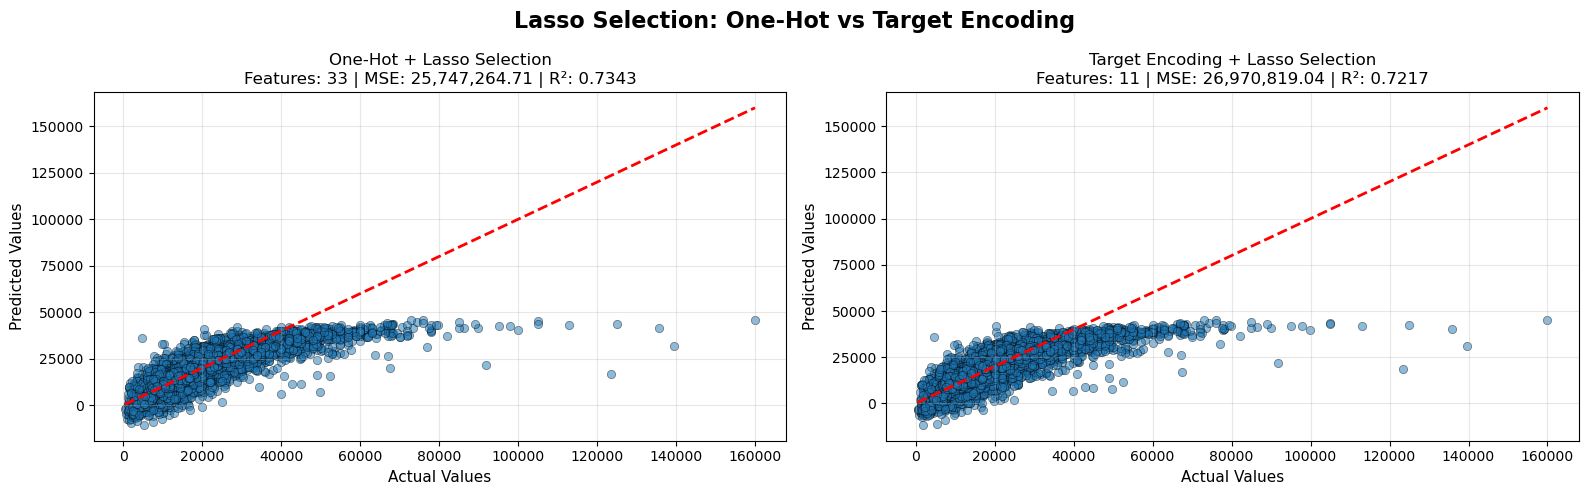

In [232]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# One-Hot + Lasso
axes[0].scatter(y_val, y_val_pred_lasso, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values', fontsize=11)
axes[0].set_ylabel('Predicted Values', fontsize=11)
axes[0].set_title(
    f'One-Hot + Lasso Selection\n'
    f'Features: {len(selected_lasso)} | MSE: {mse_lasso:,.2f} | R²: {r2_lasso:.4f}', 
    fontsize=12
)
axes[0].grid(True, alpha=0.3)

# Target + Lasso
axes[1].scatter(y_val, y_val_pred_target_lasso, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values', fontsize=11)
axes[1].set_ylabel('Predicted Values', fontsize=11)
axes[1].set_title(
    f'Target Encoding + Lasso Selection\n'
    f'Features: {len(selected_lasso_target)} | MSE: {mse_target_lasso:,.2f} | R²: {r2_target_lasso:.4f}', 
    fontsize=12
)
axes[1].grid(True, alpha=0.3)

plt.suptitle('Lasso Selection: One-Hot vs Target Encoding', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

##### Now We will Try to use correlation for numerical features and Chi-Square for categorical variables

In [233]:
train_corr = X_train[num_cols].copy()
train_corr['price'] = y_train

# Calculate correlation with price
corr = train_corr.corr()['price'].drop('price').abs().sort_values(ascending=False)

print("\nCorrelation with price:")
print(corr)


Correlation with price:
engineSize       0.595851
year             0.489229
mileage          0.420701
mpg              0.383748
tax              0.295106
paintQuality%    0.000267
Name: price, dtype: float64


In [234]:
correlation_threshold = 0.05
selected_num_cols = corr[corr > correlation_threshold].index.tolist()
print(f"\nSELECTED NUMERICAL FEATURES: {selected_num_cols}")


SELECTED NUMERICAL FEATURES: ['engineSize', 'year', 'mileage', 'mpg', 'tax']


##### we choose threshhold of 0.5 for correlations if a variable has low correlation with the target variable (below than ) we dont select it 

In [235]:
#chisquare for categorical variables
def TestIndependence(X, y, var, alpha=0.05):
    
    dfObserved = pd.crosstab(y, X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
    if p < alpha:
        result = f" {var} is IMPORTANT for Prediction (p-value: {p:.4f})"
        is_important = True
    else:
        result = f"✗ {var} is NOT important (p-value: {p:.4f}) - Consider discarding"
        is_important = False
    
    print(result)
    return is_important
# Bin the target variable for chi-square test 
#we discretize the target variable in order to compare it with the categorical variables
price_bins = pd.qcut(y_train, q=5, labels=['Very_Low', 'Low', 'Medium', 'High', 'Luxury'], duplicates='drop')
selected_cat_cols = []
for col in cat_cols:
    is_important = TestIndependence(X_train[col], price_bins, col, alpha=0.05)
    if is_important:
        selected_cat_cols.append(col)
print(f"\nSELECTED CATEGORICAL FEATURES: {selected_cat_cols}")

✓ Brand is IMPORTANT for Prediction (p-value: 0.0000)
✗ model is NOT important (p-value: 0.4227) - Consider discarding
✓ transmission is IMPORTANT for Prediction (p-value: 0.0000)
✓ fuelType is IMPORTANT for Prediction (p-value: 0.0000)

SELECTED CATEGORICAL FEATURES: ['Brand', 'transmission', 'fuelType']


In [236]:
all_selected_cols = selected_num_cols + selected_cat_cols

##### Now we will apply One hot encoding for the categorical variables and Scaling Numerical Ones


In [237]:
if len(selected_cat_cols) > 0:
    
    
    # Create preprocessor with selected features only
    preprocessor_selected = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), selected_num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), selected_cat_cols)
        ]
    )
    
    # Fit and transform
    X_train_selected = preprocessor_selected.fit_transform(X_train[all_selected_cols])
    X_val_selected = preprocessor_selected.transform(X_val[all_selected_cols])
    X_test_selected = preprocessor_selected.transform(X_test[all_selected_cols])
    
    # Get feature names
    encoded_cat_cols = preprocessor_selected.named_transformers_['cat'].get_feature_names_out(selected_cat_cols)
    final_cols = np.concatenate([selected_num_cols, encoded_cat_cols])
    
    # Convert to DataFrame
    X_train_selected = pd.DataFrame(X_train_selected, columns=final_cols, index=X_train.index)
    X_val_selected = pd.DataFrame(X_val_selected, columns=final_cols, index=X_val.index)
    X_test_selected = pd.DataFrame(X_test_selected, columns=final_cols, index=X_test.index)
    
    
    print(f"  Encoded categorical features created: {len(encoded_cat_cols)}")
    
else:
    print("\nNo categorical features selected, using numerical only...")
    
    # Scale numerical features only
    scaler_selected = StandardScaler()
    X_train_selected = pd.DataFrame(
        scaler_selected.fit_transform(X_train[selected_num_cols]),
        columns=selected_num_cols,
        index=X_train.index
    )
    X_val_selected = pd.DataFrame(
        scaler_selected.transform(X_val[selected_num_cols]),
        columns=selected_num_cols,
        index=X_val.index
    )
    X_test_selected = pd.DataFrame(
        scaler_selected.transform(X_test[selected_num_cols]),
        columns=selected_num_cols,
        index=X_test.index
    )
    
    print(" Scaling complete")

# Final preprocessed data
X_train_corr_chi = X_train_selected
X_val_corr_chi = X_val_selected
X_test_corr_chi = X_test_selected


Applying One-Hot Encoding to selected categorical features...
✓ One-Hot Encoding complete
  Encoded categorical features created: 21


##### Now retraining the model

In [238]:
model_corr_chi_onehot = Ridge(alpha=1.0, random_state=42)
model_corr_chi_onehot.fit(X_train_corr_chi, y_train)

# Predictions
y_val_pred_corr_chi = model_corr_chi_onehot.predict(X_val_corr_chi)


In [239]:
#Evaluation
mse_corr_chi = mean_squared_error(y_val, y_val_pred_corr_chi)
rmse_corr_chi = np.sqrt(mse_corr_chi)
r2_corr_chi = r2_score(y_val, y_val_pred_corr_chi)
print(f"  MSE:  {mse_corr_chi:,.2f}")
print(f"  RMSE: {rmse_corr_chi:,.2f}")
print(f"  R²:   {r2_corr_chi:.4f}")

  MSE:  25,748,312.05
  RMSE: 5,074.28
  R²:   0.7343


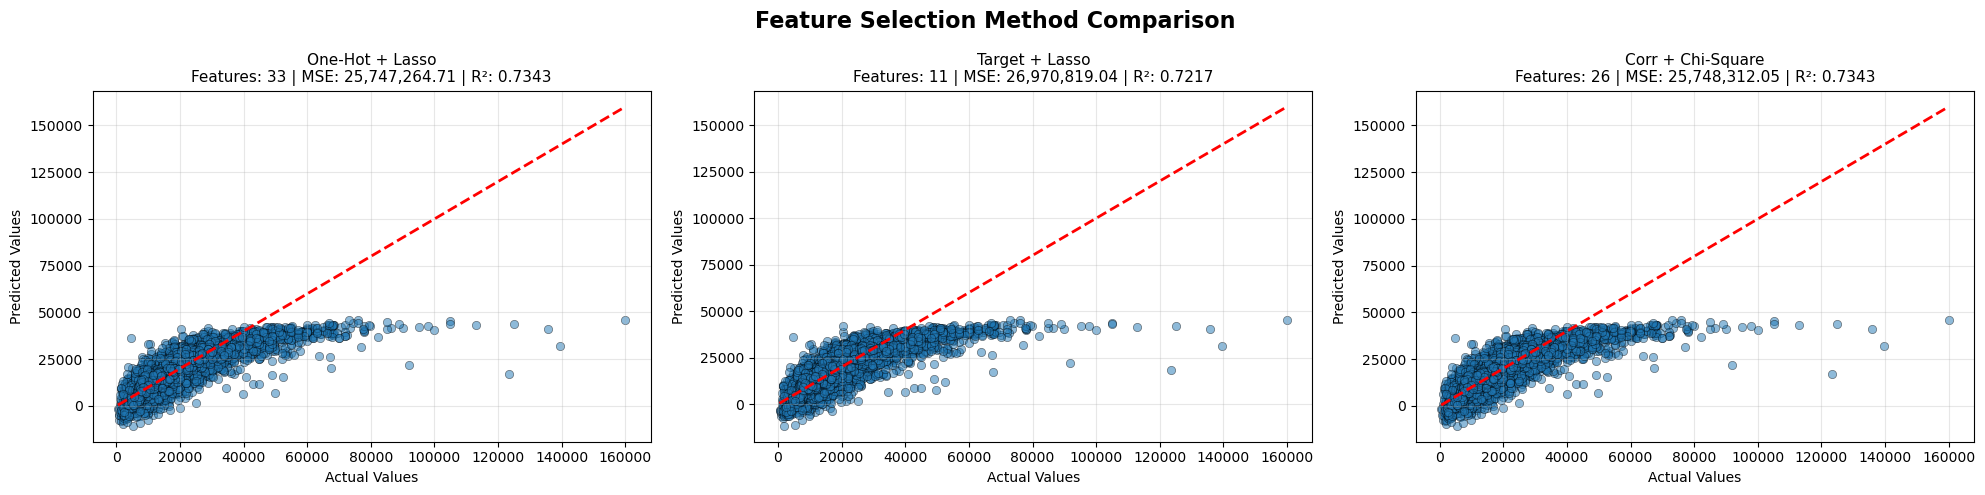

In [240]:


fig, axes = plt.subplots(1, 3, figsize=(20, 5))

models = [
    ('One-Hot + Lasso', y_val_pred_lasso, mse_lasso, r2_lasso, len(selected_lasso)),
    ('Target + Lasso', y_val_pred_target_lasso, mse_target_lasso, r2_target_lasso, len(selected_lasso_target)),
    ('Corr + Chi-Square', y_val_pred_corr_chi, mse_corr_chi, r2_corr_chi, X_train_corr_chi.shape[1])
]

for idx, (name, y_pred, mse, r2, n_features) in enumerate(models):
    axes[idx].scatter(y_val, y_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
    axes[idx].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Values', fontsize=10)
    axes[idx].set_ylabel('Predicted Values', fontsize=10)
    axes[idx].set_title(
        f'{name}\nFeatures: {n_features} | MSE: {mse:,.2f} | R²: {r2:.4f}', 
        fontsize=11
    )
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Feature Selection Method Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### We will now change to the tree based model 

In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

print("="*60)
print("RANDOM FOREST WITH TREE-BASED FEATURE SELECTION")
print("="*60)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)


rf_selector = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

feature_selector = SelectFromModel(
    rf_selector,
    threshold='median'  # Keep top 50% most important features
)


rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline(steps=[
    ('prep', preprocessor),           # Preprocessing
    ('select', feature_selector),     # Tree-based selection
    ('model', rf_model)               # Final RF model
])

print("\nTraining Random Forest pipeline...")
rf_pipeline.fit(X_train, y_train)

print("Making predictions...")
y_val_pred_rf = rf_pipeline.predict(X_val)

# Calculate metrics
r2_rf = r2_score(y_val, y_val_pred_rf)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_rf = np.sqrt(mse_rf)
n_features_rf = rf_pipeline.named_steps['select'].get_support().sum()


print("RANDOM FOREST RESULTS")
print(f"{'='*60}")
print(f"  R²:   {r2_rf:.4f}")
print(f"  MSE:  {mse_rf:,.2f}")
print(f"  RMSE: {rmse_rf:,.2f}")
print(f"  Features kept: {n_features_rf}")
print(f"{'='*60}")

RANDOM FOREST WITH TREE-BASED FEATURE SELECTION

Training Random Forest pipeline...
Making predictions...

RANDOM FOREST RESULTS
  R²:   0.8966
  MSE:  10,023,069.21
  RMSE: 3,165.92
  Features kept: 26


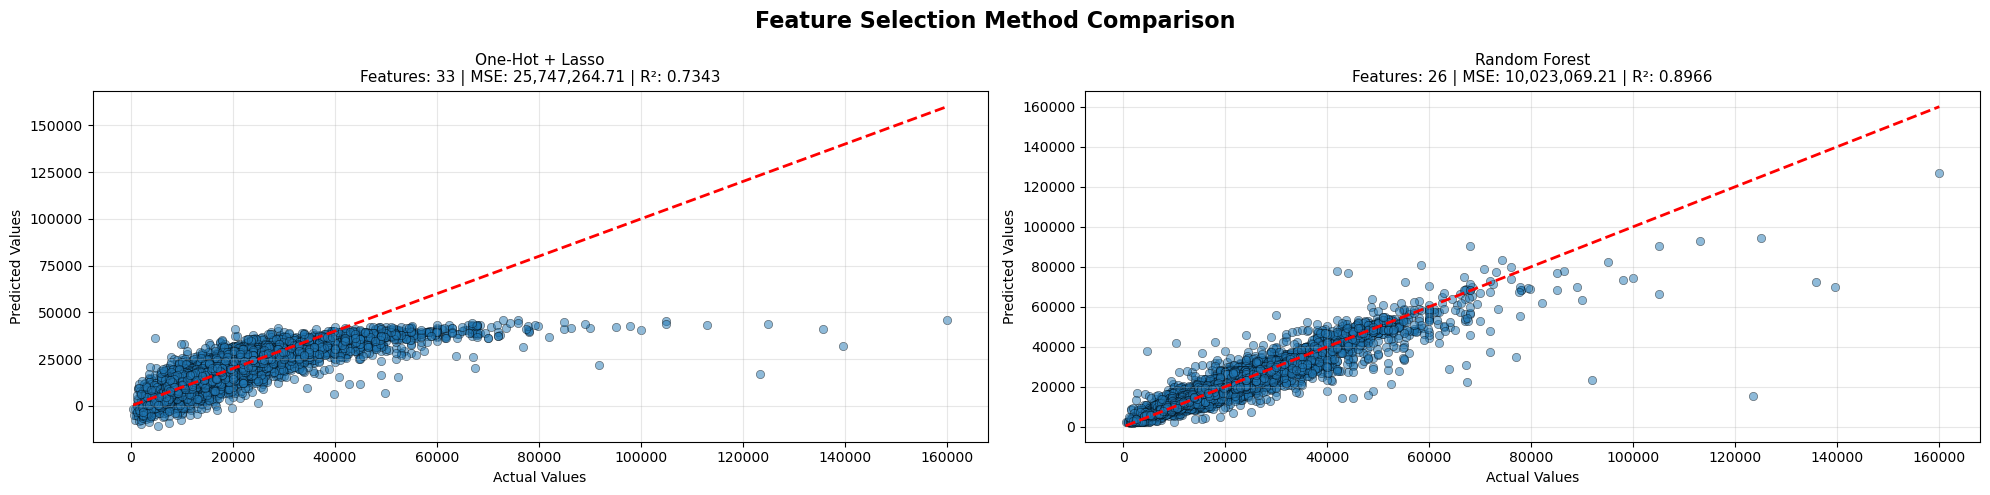

In [243]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

models = [
    ('One-Hot + Lasso', y_val_pred_lasso, mse_lasso, r2_lasso, len(selected_lasso)),
    ('Random Forest', y_val_pred_rf, mse_rf, r2_rf, n_features_rf)
]

for idx, (name, y_pred, mse, r2, n_features) in enumerate(models):
    axes[idx].scatter(y_val, y_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
    axes[idx].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Values', fontsize=10)
    axes[idx].set_ylabel('Predicted Values', fontsize=10)
    axes[idx].set_title(
        f'{name}\nFeatures: {n_features} | MSE: {mse:,.2f} | R²: {r2:.4f}', 
        fontsize=11
    )
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Feature Selection Method Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

From this comparison, we are concluding that the best model is the  random forest one .